In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from env_config import DATA_PATH
from utils import *
from data import *
from plotting import *
from evaluation import *

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

sns.set(style='ticks')
sns.set_palette('cubehelix')

# Read data

In [4]:
sdss = read_fits_to_pandas(path.join(DATA_PATH, 'SDSS/specObj-dr14.fits'), columns=COLUMNS_SDSS)
sdss = clean_sdss(sdss)

Cleaning SDSS: 4151126 left


In [5]:
sdss_x_gaia = read_fits_to_pandas(path.join(DATA_PATH, 'SDSS/SDSS.DR14.x.GAIA.DR2.fits'),
                                  columns=COLUMNS_SDSS+COLUMNS_GAIA)
sdss_x_gaia = clean_sdss(sdss_x_gaia)

Cleaning SDSS: 1426995 left


In [6]:
kids_x_sdss = process_kids(path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.x.SDSS.DR14.fits'), sdss_cleaning=True,
                           columns=COLUMNS_KIDS_ALL+COLUMNS_SDSS)

Data shape: (152244, 49)
Droping NANs: 130777 (85.90%) left
Cleaning SDSS: 122964 left


In [7]:
kids_x_sdss_x_gaia = process_kids(path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.x.SDSS.DR14.x.GAIA.DR2.fits'),
                                  sdss_cleaning=True, columns=COLUMNS_KIDS_ALL+COLUMNS_SDSS+COLUMNS_GAIA)

Data shape: (55771, 55)
Droping NANs: 49464 (88.69%) left
Cleaning SDSS: 47543 left


# Describe data

In [8]:
print(get_column_desc(sdss['CLASS']))

GALAXY - 2541424 (61.22%)
QSO - 680843 (16.40%)
STAR - 928859 (22.38%)


In [9]:
print(get_column_desc(sdss_x_gaia['CLASS']))

GALAXY - 336129 (23.56%)
QSO - 361138 (25.31%)
STAR - 729728 (51.14%)


In [10]:
print(get_column_desc(kids_x_sdss['CLASS']))

GALAXY - 84728 (68.90%)
QSO - 13611 (11.07%)
STAR - 24625 (20.03%)


In [11]:
print(get_column_desc(kids_x_sdss_x_gaia['CLASS']))

GALAXY - 15717 (33.06%)
QSO - 9780 (20.57%)
STAR - 22046 (46.37%)


# SDSS x GAIA

5 position shape: (992384, 11)


/mnt/home/snakoneczny/tools/anaconda3/envs/python3-gpu/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/mnt/home/snakoneczny/tools/anaconda3/envs/python3-gpu/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Removing paralax_error shape: (867941, 14)
Removing pmra_error shape: (721039, 14)
Removing pmdec_error shape: (702355, 14)
GALAXY - 3784 (0.54%)
QSO - 138428 (19.71%)
STAR - 560143 (79.75%)
QSO:
         parallax       pmra       pmdec
mean   -0.0172845 -0.0209419  -0.0258889
median -0.0262785 -0.0106862  0.00750385
sigma    0.517696    1.71207     1.81492
STAR:
        parallax     pmra    pmdec
mean    0.710942 -1.80905 -6.37026
median   0.38428 -1.12754 -4.21969
sigma    1.38027  11.9131  10.8621
GALAXY:
        parallax      pmra     pmdec
mean    0.156374 -0.699663  -2.49742
median  0.108192 -0.123484 -0.633517
sigma    1.18417    5.6863   6.66779


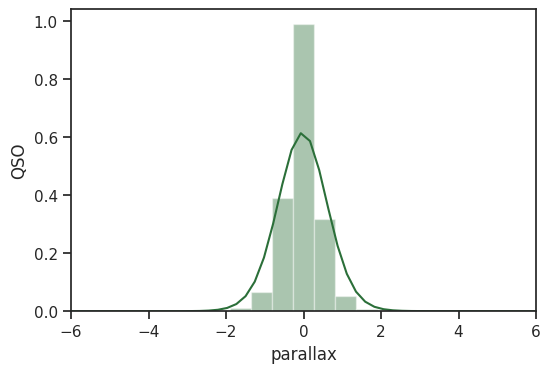

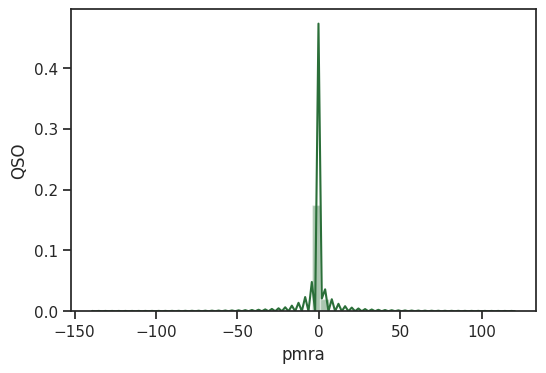

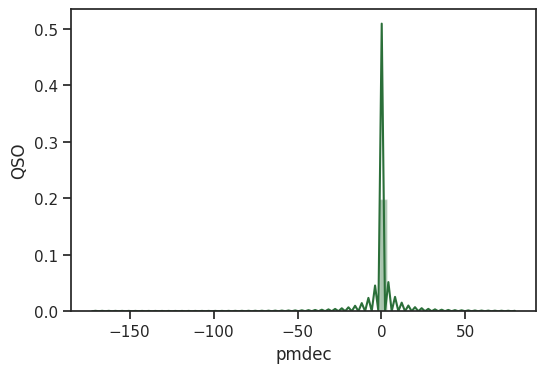

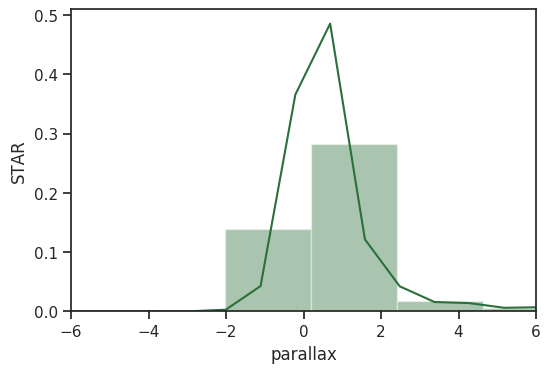

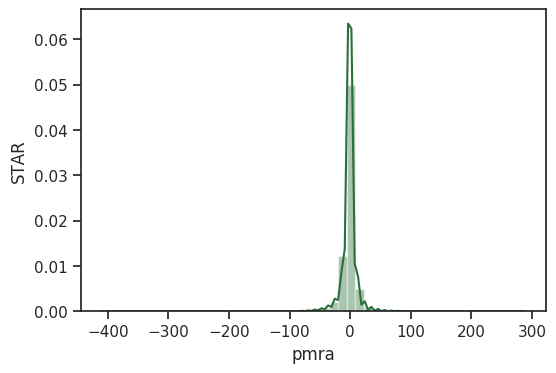

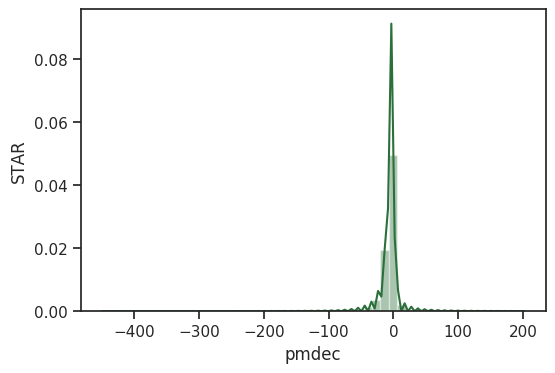

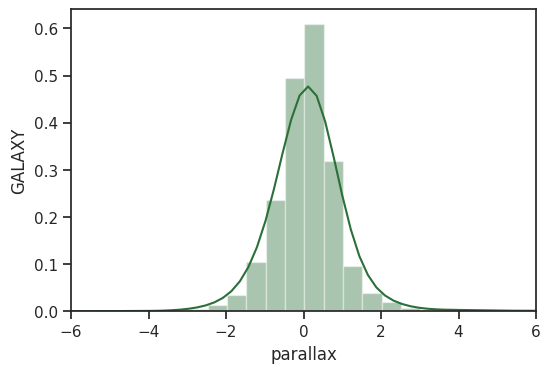

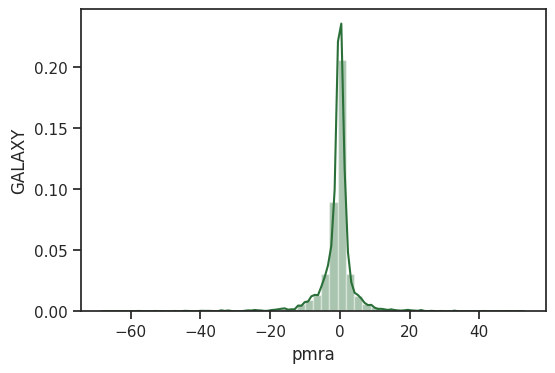

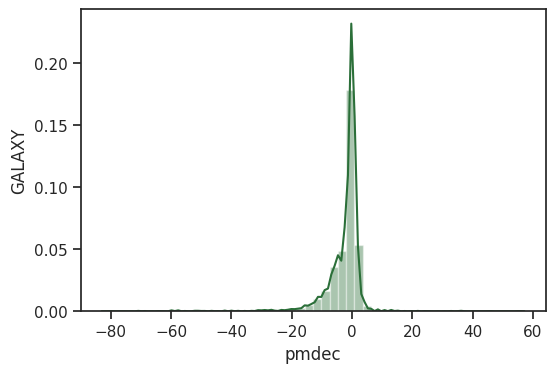

In [12]:
sdss_x_gaia_clean = process_gaia(sdss_x_gaia, parallax_error=1, pm_error=1)
print(get_column_desc(sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(sdss_x_gaia_clean, class_col='CLASS')

# KiDS x SDSS x GAIA

5 position shape: (28560, 153)
Removing paralax_error shape: (24969, 156)
Removing pmra_error shape: (19566, 156)
Removing pmdec_error shape: (19462, 156)
GALAXY - 118 (0.61%)
QSO - 3859 (19.83%)
STAR - 15485 (79.57%)
QSO:
          parallax        pmra      pmdec
mean   -0.00450703 -0.00998079 -0.0117933
median  -0.0113339  -0.0158939 -0.0020249
sigma     0.455086     2.04443    1.34638
STAR:
        parallax     pmra    pmdec
mean    0.595182 -6.29608 -6.19967
median  0.333435 -3.82349 -3.97394
sigma    1.25028  11.2685  9.78053
GALAXY:
        parallax     pmra    pmdec
mean    0.231149 -3.93257 -3.49948
median  0.247401 -1.29589 -1.49477
sigma   0.656269  7.20771  5.58727


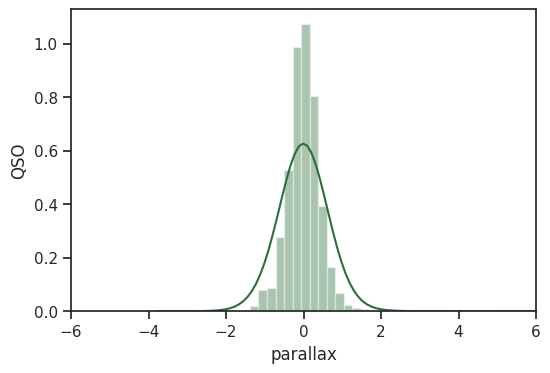

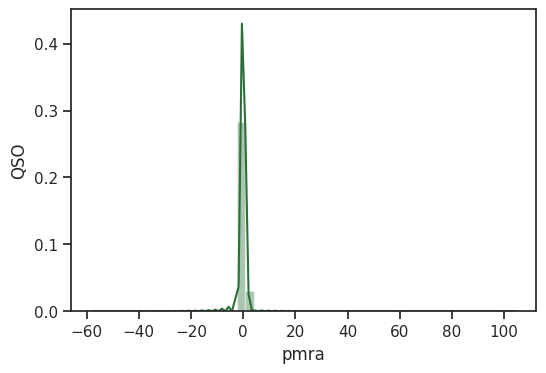

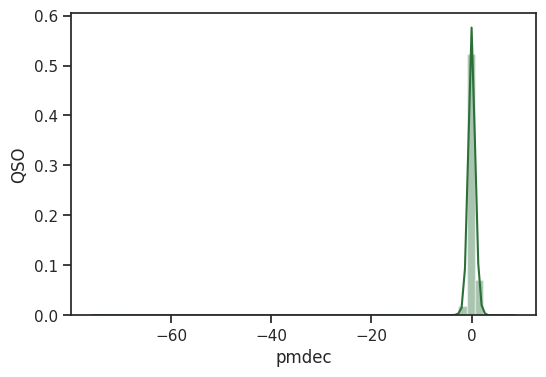

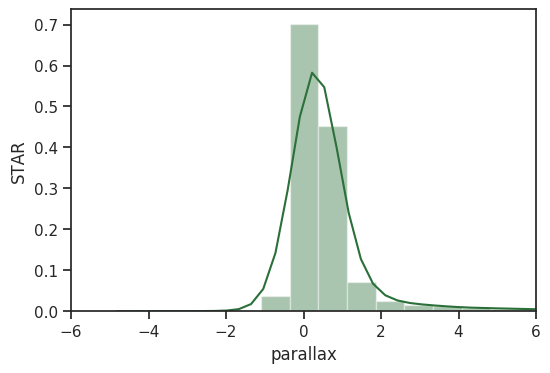

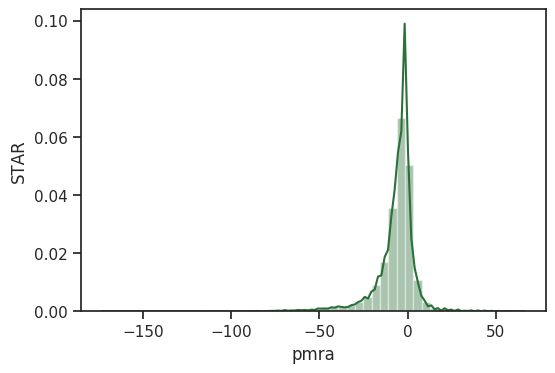

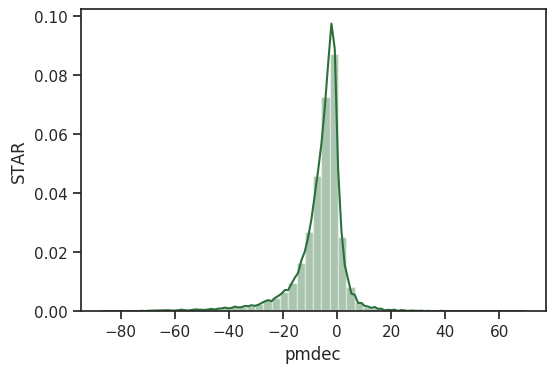

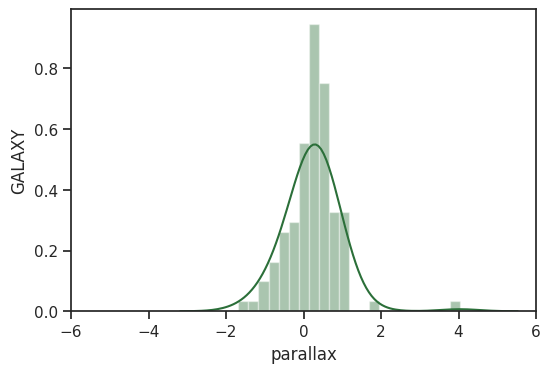

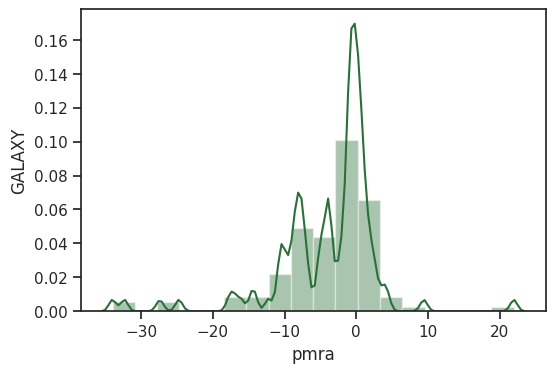

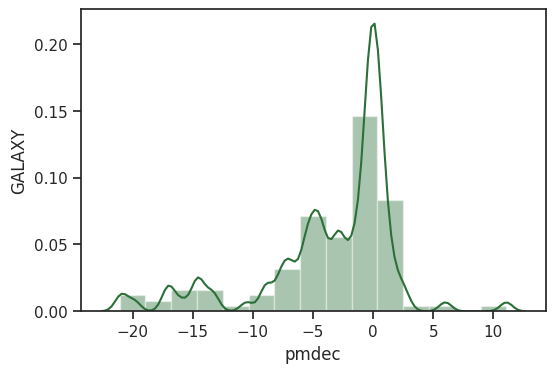

In [13]:
kids_x_sdss_x_gaia_clean = process_gaia(kids_x_sdss_x_gaia, parallax_error=1, pm_error=1)
print(get_column_desc(kids_x_sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(kids_x_sdss_x_gaia_clean, class_col='CLASS')

# Acceptable from experiment results

In [17]:
gal = 0.0199
qso = 0.9706
star = 0.0095

print('SDSS parallax')
print(qso * -0.017 + star * 0.71 + gal * 0.16)

print('train parallax')
print(qso * -0.005 + star * 0.6 + gal * 0.23)

print('SDSS pm ra')
print(qso * -0.021 + star * -1.81 + gal * -0.70)

print('train pm ra')
print(qso * -0.010 + star * -6.30 + gal * -3.93)

print('SDSS pm dec')
print(qso * -0.026 + star * -6.37 + gal * -2.50)

print('train pm dec')
print(qso * -0.012 + star * -6.20 + gal * -3.50)

SDSS parallax
-0.006571200000000004
train parallax
0.005423999999999999
SDSS pm ra
-0.0515076
train pm ra
-0.147763
SDSS pm dec
-0.1355006
train pm dec
-0.14019720000000002
